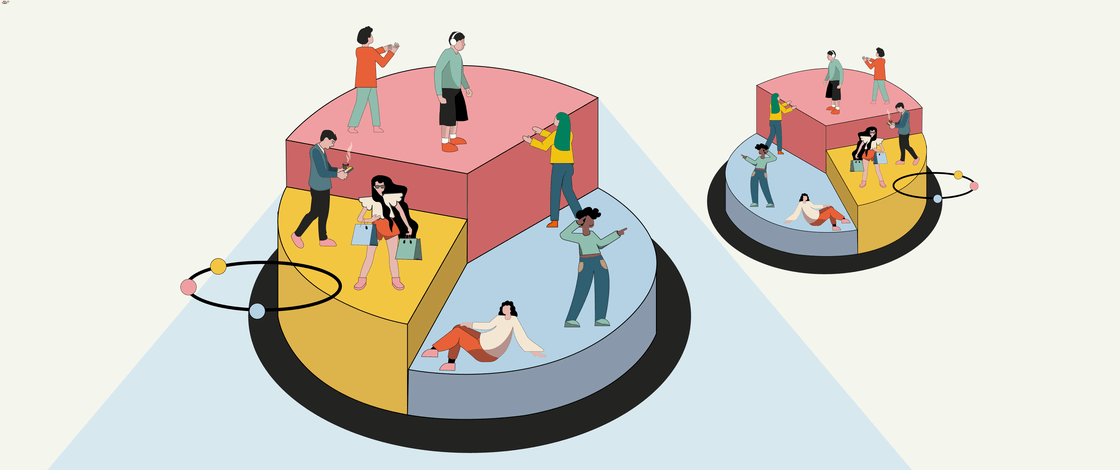

In [1]:
from IPython.display import Image
Image(filename='Top-Customer-Segmentation-Examples-every-Marketer-Needs-to-Know.png')

# SegmentSavvy

**Revolutionizing the Shopping Experience for Bicycle Enthusiasts**

Dionne Taylor, Adam Harris, Edward Michaud, Caroline Miller

O'Neil Cohort - Data Science

June 16, 2023

**Project Goal:**  The endstate for this project includes three components:  1) Clustering Model which identifies like-minded customers based off of their purchasing power, historical item purchases, and customer age, 2) Classification Model which can identify the cluster in which a customer's transaction can be segmented, and 3) Recommender System which can link the cluster of a customer with a Amazon product which fits the customer's potential interests and budget. The project acts as proof of concept which can be summarized as using consumer sales data for particular categories of goods, in this case cycling equipment, from smaller businesses to feed marketing decisions for a global, ecommerce company like Amazon which sells a vast scope of products. 

**Project Description:** The project combines two overarching concepts and technologies:  1) customer segementation and 2) product recommendation. The first concept uses a dataset from a small cycling retailor which serves online customers from the United States, the United Kingdom, France, and Germany. The cycling shop sells primarily bikes, accessories, and clothing. Clustering is used to compile similar transactions based on purchasing power (amount spent), category of item purchased, and customer age. These clusters of transactions serve to illustrate distinct customer types. Classification machine learning is then used to cluster transactions based on demographic data as well as transactional data. The second concept uses a dataset which acts as an inventory list for cyling products which Amazon offers. Natural Language Processing techniques to further categorize the cycling product list to fit the clusters of customer types. The customer types from clustering coalesce with the sub-categories of Amazon cycling products in a recommender system which matches appropriate Amazon products to customers based on their interests, past purchases, and inferred budget. 

**Project Purpose:** Online consumers use Amazon to buy affordable, convenient products of a wide variety. Amazon makes online shopping easy and expedient. A wide variety of products can prove to be overwhelming for consumers especially if the consumer is looking for a specific product. There are multiple sports, hobbies, and jobs that require specialized expertise and personizalization when choosing products. Some of these activities include mountain climbing, cycling, backpacking, fishing, and equestrianism. People who engage in these kinds of activities are highly skilled and particular about the brands and products they use. The question this project aims to answer is can an online retailor with an immense assortment of products create a boutique style of personalized product recommendations to customers whose purchases revolve around niche and exclusive themes such as cycling? With artificial intelligence and machine learning, personalized customer segementation can be used to tailor online commerse to accomplish this goal. 

### Data Dictionary

**Dataset 1: Bicycle Sales Data**

| **Object Returned** | **Description** |
|:-------------------|:--------------------------------|
| 1. date | date of transaction (datetime) |
| 2. year | year of transaction (object) |
| 3. month | month pf transaction (integer) |
| 4. customer_age |  age of the customer at the time of purchase (Float) |
| 5. customer_gender | gender of customer (female/male) |
| 6. country | country of origin of customer (object) |
| 7. state | state or province of customer (Float)  |
| 8. product_category | broad category of item purchased (object)   |
| 9. sub_category | descriptive category of item purchased(object)   |
| 10. quantity | the number of products purchased for the transaction (Float)  |
| 11. unit_cost | price which the store paid per item purhased in transaction (Float)  |
| 12. unit_price | price which the customer paid per item purchased in transaction (float)   |
| 13. cost | total prie the store paid for the quantity of item purchased in transaction(float)   |
| 14. revenue | total revenue accrued for the quantity  of items purchaseed in transaction (Float)  |

**Dataset 2: Amazon Cycling Product Data**

| **Object Returned** | **Description** |
|:-------------------|:--------------------------------|
| 1. | name	The name of the product |
| 2. | main_category	The main category of the product belong |
| 3. | sub_category	The main category of the product belong |
| 4. | image	The image of the product look like |
| 5. | link	The amazon website reference link of the product |
| 6. | ratings	The ratings given by amazon customers of the product |
| 7. | no of ratings	The number of ratings given to this product in amazon shopping |
| 8. | discount_price	The discount prices of the product |
| 9. | actual_price	The actual MRP of the product |

### Imports

In [2]:
import wrangle as w

## Acquire


- The Bicycle Shop Sales Dataset was acquired from data.world


    - The wrangle.py file located in the project repository contains an aqcuire function which can be used. The function will either save a local copy of the dataset as a csv file to your local directory or it will read the file from the link into a pandas dataframe. 

    - The dataset was uploaded by the author six years ago, 2018

    - This project acquired the data in 2023

    - The dataset in its unclean form contains 34,867 rows (transactions) and 15 columns
    

- The Amazon Cycling Product Data was acquired from Kaggle.com


    - The dataset was loaded onto Kaggle.com in 2023
    
    - The dataset was scraped from Amazon.com (License: https://creativecommons.org/licenses/by-nc/4.0/)
    
    - The dataset in its unclean form contains 1,152 rows each representing one item in Amazon's cycling inventory and 9 columns

In [3]:
# calling the acquire_data() function from the wrangle.py module which loads the bicycle shop dataset

df = w.acquire_data()

Opening data from local file.


In [10]:
df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Prepare


When called, the wrangle_data() function from the wrangle.py module actions the following steps:

    - Takes in the dataframe from acquire_data()
    - Lowercased the column names
    - replaces spaces with underscores in the column names
    - The datatype of column 'year' changed to int 
    - The datatype of column 'customer_age' changed to int
    - The datatype of column 'quantity' changed to int
    - The numeric values in columns 'unit_cost', 'unit_price', 'cost', and 'revenue' rounded to represent monetary value
    - The categorical columns 'sub_category', 'customer_gender', and 'country' one_hot_encoded
    - The categorical column 'product_category' label encoded 
    - Dataframe split into train, validate, and test dataset to prevent overfitting and prepare train for exploration
    
**Note:**  Null values were dropped from the dataframe. There was onw row with null values. This may have been input error and therefore the transaction record was removed.

In [11]:
df, train, validate, test = w.wrangle_data()

Opening data from local file.


## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

## You may use this as a template for how to ask and answer each question:

### 1) Question about the data
* Ask a question about the data for which you got a meaningful result
* There is no connection can be a meaningful result

### 2) Visualization of the data answering the question

* Visualizations should be accompanied by take-aways telling the reader exactly what you want them to get from the chart
* You can include theses as bullet points under the chart
* Use your chart title to provide the main take-away from each visualization
* Each visualization should answer one, and only one, of the explore questions

### 3) Statistical test
* Be sure you are using the correct statistical test for the type of variables you are testing
* Be sure that you are not violating any of the assumptions for the statistical test you are choosing
* Your notebook should run and produce the results of the test you are using (This may be done through imports)
* Include an introduction to the kind of test you are doing
* Include the Ho and Ha for the test
* Include the alpha you are using
* Include the readout of the p-value for the test
* Interpret the results of the test in natural language (I reject the null hypothesis is not sufficient)

### 4) Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

## Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [5]:
# If you use code to generate your baseline run the code and generate the output here

Printout should read: <br>
Baseline: "number" "evaluation metric"

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Model Type

In [6]:
# Code that runs the best model in that model type goes here 
# (This may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on train: "evaluation result" <br>
"evaluation metric" on validate: "evaluation result"

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [7]:
# Code that runs the best overall model on test data (this may be imported from a module)

Printout of model code should read: <br>
"Model Type" <br>
"evaluation metric" on Test: "evaluation result" <br>

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summery
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**

# README

Your README should contain all of the following elements:

* **Title** Gives the name of your project
* **Project Description** Describes what your project is and why it is important 
* **Project Goal** Clearly states what your project sets out to do and how the information gained can be applied to the real world
* **Initial Hypotheses** Initial questions used to focus your project 
* **Project Plan** Guides the reader through the different stages of the pipeline as they relate to your project
* **Data Dictionary** Gives a definition for each of the features used in your report and the units they are measured in, if applicable
* **Steps to Reproduce** Gives instructions for reproducing your work. i.e. Running your notebook on someone else's computer.